In [120]:
import seaborn as sb
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

In [121]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [202]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/All_Data_Prepped.csv"

df= read_file(url).iloc[:65378,:]

## Scaling the features

In [129]:
# scaler = StandardScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Checking number of clusters

In [133]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

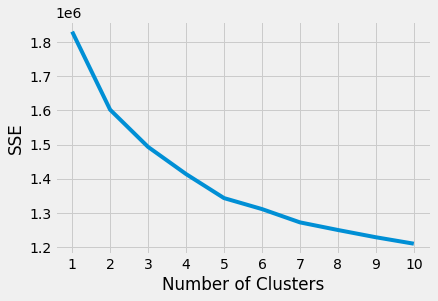

In [134]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [135]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [136]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

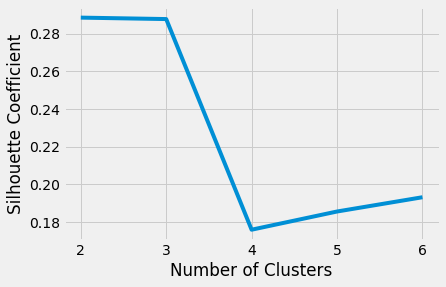

In [137]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## K-means with 5 clusters

In [138]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300
)

In [139]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5)

In [140]:
# The lowest SSE value
kmeans.inertia_

1343277.6731865243

In [141]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-8.09437181e-01,  8.40217250e+00,  5.17364450e-01,
         7.88873707e-03, -1.03309786e+00, -4.43095724e-01,
        -9.42482058e-01,  5.04769150e-01,  5.04729271e-01,
        -1.04754460e+00, -2.18106813e-01, -5.29824936e-01,
        -9.57196916e-02, -2.95223402e-01,  1.32999264e+00,
         1.04224098e-02, -1.61475945e-01,  2.77979702e-03,
        -7.51775239e-03,  4.09349199e-01,  3.94271536e-03,
         4.11000214e-03, -1.84333480e-02,  1.11719475e+00,
         1.05633788e+01,  5.75482775e+00,  1.08052652e-01,
         2.37190623e+00],
       [ 1.66412454e-02, -3.16696956e-02, -3.97960330e-03,
        -9.44113125e-03, -6.95158897e-02, -3.67961146e-01,
        -2.66916964e-02, -4.69020074e-03, -4.69366041e-03,
        -1.19682537e-01, -1.94302624e-01, -6.04646848e-01,
        -1.58727124e-01, -2.52751706e-02,  2.04185928e-02,
        -3.86523021e-02, -1.34890108e-01, -4.11967455e-03,
        -3.23001439e-03, -9.71090063e-02,  4.00720381e-03,
         4.01946216e-03, -6.82

In [142]:
# The number of iterations required to converge
kmeans.n_iter_

34

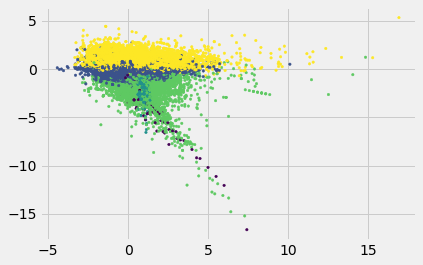

In [144]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=kmeans.labels_, cmap='viridis', alpha=1);

(-5.0, 5.0)

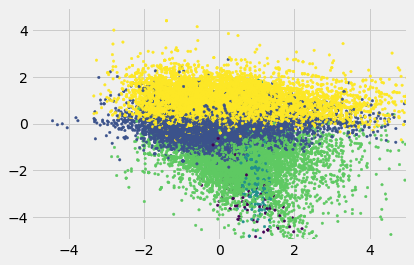

In [145]:
#zoomed in
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=kmeans.labels_, cmap='viridis');
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [146]:
is_labeled=df.iloc[:,32]

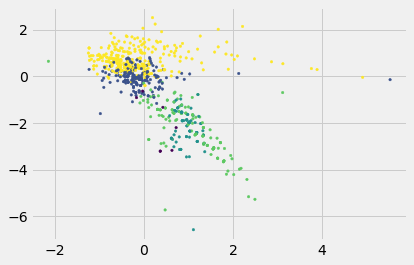

In [154]:
#showing the labeled (PBT concern/Bendik data only)
scaled_features_labeled = scaled_features[is_labeled == 1]
features_labeled = features.to_numpy()[is_labeled == 1]
kmeans_labels_labeled = kmeans.labels_[is_labeled == 1]
#Showing PBT concern data only
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], s=6,c=kmeans_labels_labeled, cmap='viridis');


(0.0, 400.0)

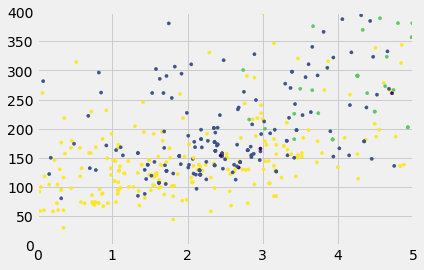

In [159]:
#Showing PBT concern data only: log kow vs MW
plt.scatter(features_labeled[:, 12], features_labeled[:, 26], s=10,c=kmeans_labels_labeled, cmap='viridis');
plt.xlim(0, 5)
plt.ylim(0, 400)

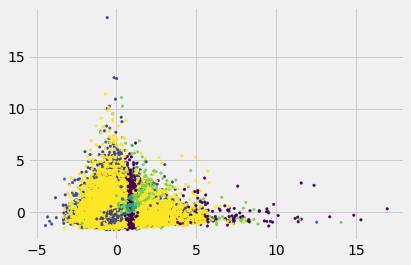

In [76]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=6, c=kmeans.labels_, cmap='viridis');

## K-Means with 2 clusters

In [56]:
kmeans2 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300
)

In [57]:
kmeans2.fit(scaled_features)

KMeans(init='random', n_clusters=2)

In [58]:
# The number of iterations required to converge
kmeans2.n_iter_

15

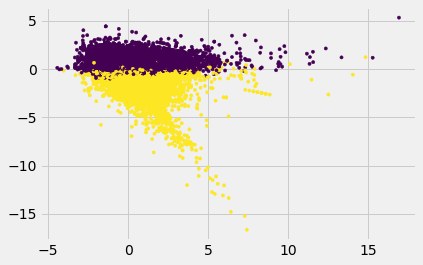

In [72]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans2.labels_, cmap='viridis');

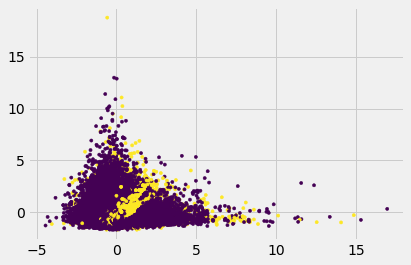

In [110]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans2.labels_, cmap='viridis');

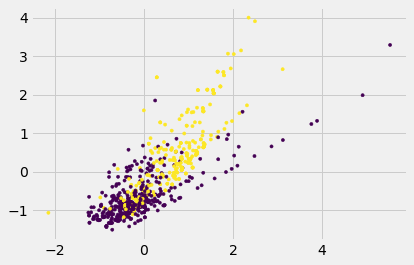

In [87]:
kmeans2_labels_labeled = kmeans2.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans2_labels_labeled, cmap='viridis');

## K-Means with 3 clusters

In [96]:
kmeans3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300
)

In [97]:
kmeans3.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [98]:
# The number of iterations required to converge
kmeans3.n_iter_

16

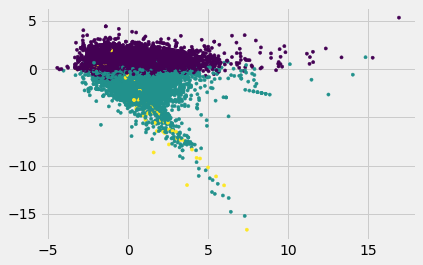

In [108]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans3.labels_, cmap='viridis');

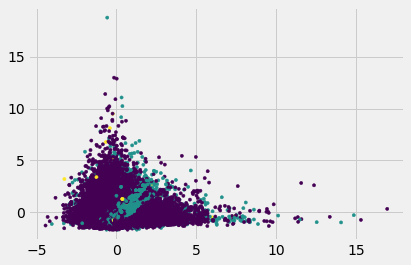

In [100]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans3.labels_, cmap='viridis');

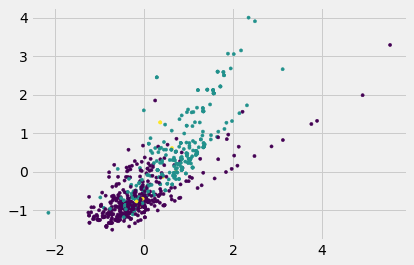

In [102]:
kmeans3_labels_labeled = kmeans3.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans3_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 2 clusters

In [160]:
from sklearn.mixture import GaussianMixture

In [161]:
gmm = GaussianMixture(n_components=2)
gmm.fit(scaled_features)

GaussianMixture(n_components=2)

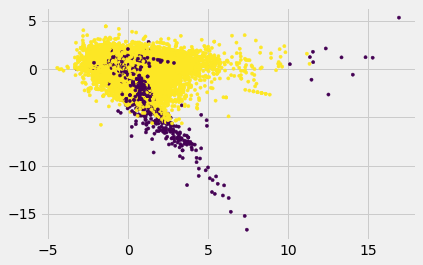

In [165]:
labels = gmm.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=labels, cmap='viridis');

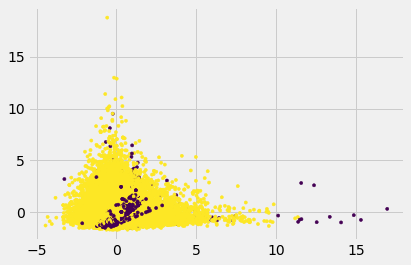

In [167]:
gmm_labels = gmm.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=gmm_labels, cmap='viridis');

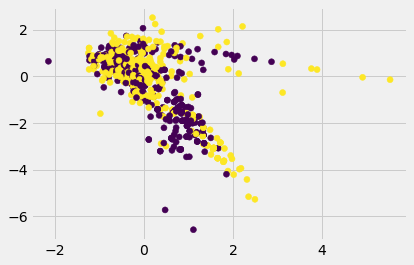

In [169]:
gmm_labels_labeled = gmm_labels[is_labeled == 1]
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], c=gmm_labels_labeled, cmap='viridis');

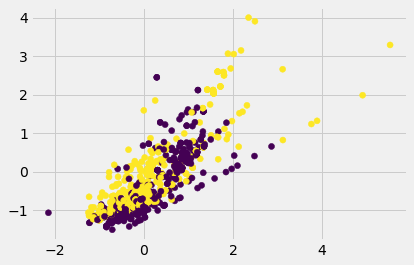

In [170]:
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], c=gmm_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 5 clusters

In [174]:
gmm5 = GaussianMixture(n_components=5)
gmm5.fit(scaled_features)

GaussianMixture(n_components=5)

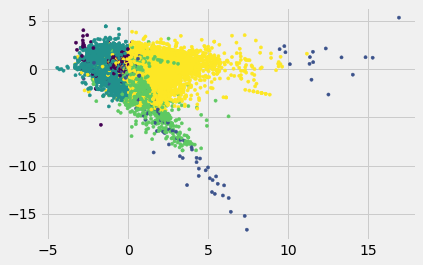

In [175]:
gmm5_labels = gmm5.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=gmm5_labels, cmap='viridis');

## DBSCAN

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

dbscan = DBSCAN(eps=0.1)
dbscan.fit(scaled_features)


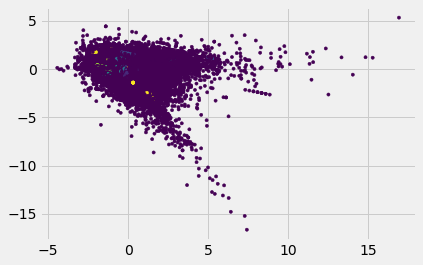

In [180]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=dbscan.labels_, cmap='viridis');

In [195]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

In [198]:
distances.shape

(65378,)

In [201]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed